In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
calls = pd.read_csv('/content/callsf0d4f5a.csv')
customers = pd.read_csv('/content/customers2afd6ea.csv')
reason = pd.read_csv('/content/reason18315ff.csv')
sentiment_statistics = pd.read_csv('/content/sentiment_statisticscc1e57a.csv')
test = pd.read_csv('/content/testbc7185d.csv')

In [ ]:
print(calls.info())
print(calls.columns)
print(calls.shape)
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB
None
Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript'],
      dtype='object')
(71810, 7)


,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [ ]:
print(customers.info())
print(customers.columns)
print(customers.shape)
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB
None
Index(['customer_id', 'customer_name', 'elite_level_code'], dtype='object')
(71810, 3)


,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [ ]:
print(reason.info())
print(reason.columns)
print(reason.shape)
reason.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   call_id              66653 non-null  int64 
 1   primary_call_reason  66653 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB
None
Index(['call_id', 'primary_call_reason'], dtype='object')
(66653, 2)


,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [ ]:
print(sentiment_statistics.info())
print(sentiment_statistics.columns)
print(sentiment_statistics.shape)
sentiment_statistics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   agent_id                 71810 non-null  int64  
 2   agent_tone               71593 non-null  object 
 3   customer_tone            71810 non-null  object 
 4   average_sentiment        71701 non-null  float64
 5   silence_percent_average  71810 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.3+ MB
None
Index(['call_id', 'agent_id', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average'],
      dtype='object')
(71810, 6)


,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [ ]:
df = pd.merge(calls, customers, on='customer_id', how='left')
df = pd.merge(df, reason, on='call_id', how='left')
df = pd.merge(df, sentiment_statistics, on=['call_id', 'agent_id'], how='left')
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,neutral,polite,-0.05,0.35


In [ ]:
print(df.info())
print(df.columns)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_id                  71810 non-null  int64  
 1   customer_id              71810 non-null  int64  
 2   agent_id                 71810 non-null  int64  
 3   call_start_datetime      71810 non-null  object 
 4   agent_assigned_datetime  71810 non-null  object 
 5   call_end_datetime        71810 non-null  object 
 6   call_transcript          71810 non-null  object 
 7   customer_name            71810 non-null  object 
 8   elite_level_code         46043 non-null  float64
 9   primary_call_reason      66653 non-null  object 
 10  agent_tone               71593 non-null  object 
 11  customer_tone            71810 non-null  object 
 12  average_sentiment        71701 non-null  float64
 13  silence_percent_average  71810 non-null  float64
dtypes: float64(3), int64(3

In [ ]:
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['agent_assigned_datetime'] = pd.to_datetime(df['agent_assigned_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

call_id                        0
customer_id                    0
agent_id                       0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
customer_name                  0
elite_level_code           25767
primary_call_reason         5157
agent_tone                   217
customer_tone                  0
average_sentiment            109
silence_percent_average        0
dtype: int64


In [ ]:
#handling missing values
df.fillna({'elite_level_code': -1} , inplace = True )
df['primary_call_reason'] = df['primary_call_reason'].fillna('Unknown')
df['average_sentiment'] = df['average_sentiment'].fillna(df['average_sentiment'].mean())
df['agent_tone'] = df['agent_tone'].fillna(df['agent_tone'].mode()[0])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['call_duration'] = (df['call_end_datetime'] - df['call_start_datetime']).dt.total_seconds()
df['waiting_time'] = (df['agent_assigned_datetime'] - df['call_start_datetime']).dt.total_seconds()
total_handle_time = df['call_duration'].sum()
total_waiting_time = df['waiting_time'].sum()
total_calls = len(df)
AHT = total_handle_time / total_calls
AST = total_waiting_time / total_calls
print("AHT:", AHT)
print("AST:", AST)

AHT: 1134.1161398133966
AST: 437.0675393399248


In [ ]:
df['primary_call_reason'].unique()

array(['Voluntary  Cancel', 'Booking', 'IRROPS', 'Upgrade', 'Seating',
       'Mileage   Plus', 'Checkout', 'Unknown', 'Voluntary   Change',
       'Post Flight', 'Check In', 'Other  Topics', 'Communications',
       'Schedule Change', 'Products & Services', 'IRROPS  ',
       'Digital   Support', 'Seating  ', 'Disability',
       'Unaccompanied Minor', ' Baggage', 'Traveler  Updates',
       'Communications  ', 'ETC', 'Upgrade  ', 'Unaccompanied Minor  ',
       'Voluntary Change', 'Voluntary Change  ', 'Checkout  ',
       'Mileage Plus', 'Mileage Plus  ', 'Booking  ', 'Baggage  ',
       'Post-Flight', 'Post-Flight  ', 'Schedule Change  ', 'Baggage',
       'Traveler Updates', 'Voluntary Cancel', 'Check-In',
       'Products and Services', 'Check-In  ', 'Other Topics',
       'Other Topics  ', 'ETC  ', 'Disability  ', 'Digital Support',
       'Digital Support  ', 'Voluntary Cancel  ',
       'Products and Services  ', 'Traveler Updates  ',
       'Traveler   Updates', 'Digital  Sup

In [ ]:
# Dictionary of replacements for standardizing values
replacements = {
    'Voluntary  Cancel': 'Voluntary Cancel',
    'Voluntary   Change': 'Voluntary Change',
    'Voluntary  Change': 'Voluntary Change',
    'Mileage   Plus': 'Mileage Plus',
    'Post Flight': 'Post-Flight',
    'Check In': 'Check-In',
    'Other  Topics': 'Other Topics',
    'Communications  ': 'Communications',
    'IRROPS  ': 'IRROPS',
    'Seating  ': 'Seating',
    'Digital   Support': 'Digital Support',
    'Unaccompanied Minor  ': 'Unaccompanied Minor',
    ' Baggage': 'Baggage',
    'Traveler  Updates': 'Traveler Updates',
    'Upgrade  ': 'Upgrade',
    'Post-Flight  ': 'Post-Flight',
    'Schedule Change  ': 'Schedule Change',
    'Voluntary Change  ': 'Voluntary Change',
    'Checkout  ': 'Checkout',
    'Mileage Plus  ': 'Mileage Plus',
    'Booking  ': 'Booking',
    'Baggage  ': 'Baggage',
    'Products & Services': 'Products and Services',
    'Digital  Support': 'Digital Support',
    'Mileage  Plus': 'Mileage Plus',
    'Traveler   Updates': 'Traveler Updates',
    'Voluntary Cancel  ': 'Voluntary Cancel',
    'Products and Services  ': 'Products and Services',
    'Traveler Updates  ': 'Traveler Updates',
    'ETC  ': 'ETC',
    'Disability  ': 'Disability',
    'Check-In  ': 'Check-In',
    'Other Topics  ': 'Other Topics'
}

# Replace inconsistent entries
df['primary_call_reason'] = df['primary_call_reason'].replace(replacements)

# Remove any leading/trailing spaces that might still exist
df['primary_call_reason'] = df['primary_call_reason'].str.strip()

# Check unique values after cleaning
print(df['primary_call_reason'].unique())


['Voluntary Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating' 'Mileage Plus'
 'Checkout' 'Unknown' 'Voluntary Change' 'Post-Flight' 'Check-In'
 'Other Topics' 'Communications' 'Schedule Change' 'Products and Services'
 'Digital Support' 'Disability' 'Unaccompanied Minor' 'Baggage'
 'Traveler Updates' 'ETC']


In [ ]:
aht_by_reason = df.groupby('primary_call_reason')['call_duration'].mean().reset_index()
ast_by_reason = df.groupby('primary_call_reason')['waiting_time'].mean().reset_index()
aht_by_reason.columns = ['primary_call_reason', 'average_aht']
ast_by_reason.columns = ['primary_call_reason', 'average_ast']
combined_metrics = pd.merge(aht_by_reason, ast_by_reason, on='primary_call_reason')
print(combined_metrics.sort_values(by='average_aht', ascending=False))

      primary_call_reason  average_aht  average_ast
3                Checkout  1741.557203   724.703390
7                     ETC  1507.184874   544.285714
11            Post-Flight  1502.327945   569.431871
9            Mileage Plus  1356.588617   361.015211
19       Voluntary Cancel  1261.381456   539.514624
16    Unaccompanied Minor  1207.500000   688.269231
20       Voluntary Change  1179.640487   540.486726
8                  IRROPS  1145.197205   360.081136
17                Unknown  1133.694008   438.301338
15       Traveler Updates  1083.265742   690.032017
4          Communications  1066.687500   239.968750
12  Products and Services  1049.009604   302.448980
14                Seating  1045.819324   570.824823
18                Upgrade   930.832725   298.487947
2                Check-In   929.968487   355.840336
5         Digital Support   878.008163   505.714286
0                 Baggage   875.741525   542.097458
6              Disability   795.632754   503.523573
13        Sc

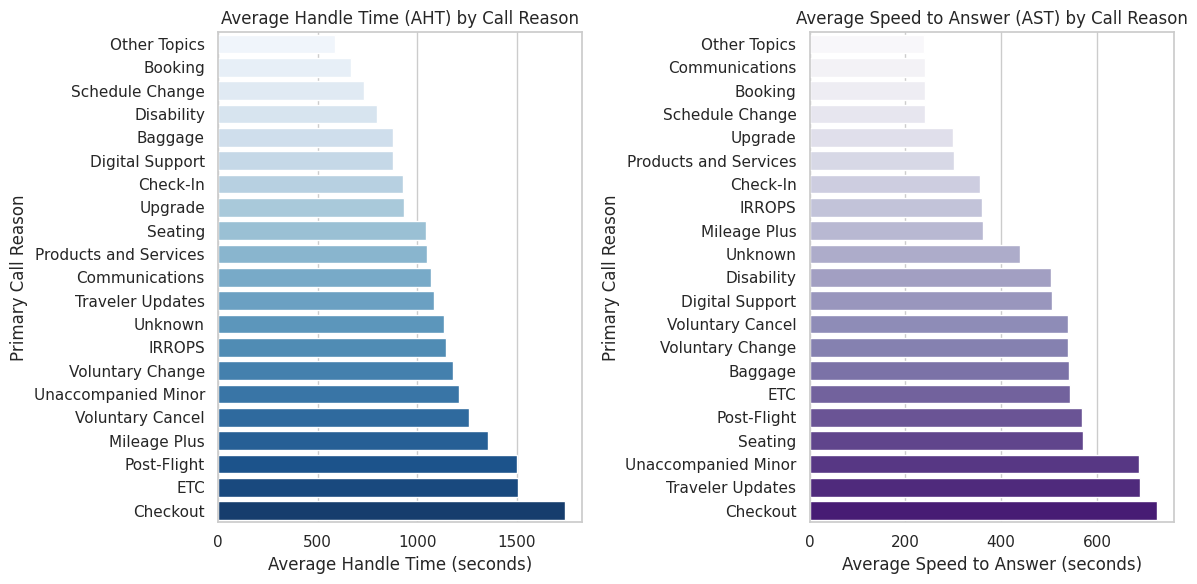

In [ ]:
sns.set(style="whitegrid")

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Bar plot for Average Handle Time by Call Reason
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='average_aht', y='primary_call_reason', data=combined_metrics.sort_values(by='average_aht'), palette='Blues')
plt.title('Average Handle Time (AHT) by Call Reason')
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Primary Call Reason')

# Bar plot for Average Speed to Answer by Call Reason
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='average_ast', y='primary_call_reason', data=combined_metrics.sort_values(by='average_ast'), palette='Purples')
plt.title('Average Speed to Answer (AST) by Call Reason')
plt.xlabel('Average Speed to Answer (seconds)')
plt.ylabel('Primary Call Reason')

# Adjust layout
plt.tight_layout()
plt.show()


---
*   Checkout ,ETC,post-flight and mileage plus leads to greater **AHT**
*   Checkout , Traveler Updates , Unaccompanied minor and seating leads to greater **AST**
---



In [ ]:
names = df['customer_name'].value_counts()
print(names.head(20))

customer_name
Michael Smith          39
Michael Johnson        31
James Smith            25
David Brown            23
Jennifer Smith         22
Christopher Johnson    21
Robert Johnson         20
Robert Smith           20
Michael Williams       20
David Smith            19
Jennifer Johnson       19
Joshua Williams        18
John Johnson           18
Christopher Smith      18
James Brown            17
John Smith             17
Kimberly Smith         17
John Jones             17
Michael Brown          17
Jennifer Williams      17
Name: count, dtype: int64


         customer_name    primary_call_reason  count
16508      David Brown                 IRROPS      8
29462   Jennifer Smith                 IRROPS      7
47876    Michael Smith                 IRROPS      7
47379  Michael Johnson           Mileage Plus      6
47885    Michael Smith       Voluntary Change      5
26738      James Smith       Voluntary Change      5
47028    Michael Davis                 IRROPS      5
47378  Michael Johnson                 IRROPS      5
47882    Michael Smith                Seating      5
55974   Robert Johnson       Voluntary Change      5
47384  Michael Johnson                Seating      4
55970   Robert Johnson                Seating      4
17184      David Smith                 IRROPS      4
47883    Michael Smith                Unknown      4
16512      David Brown                Upgrade      4
26736      James Smith                Unknown      3
26733      James Smith            Post-Flight      3
26731      James Smith                 IRROPS 

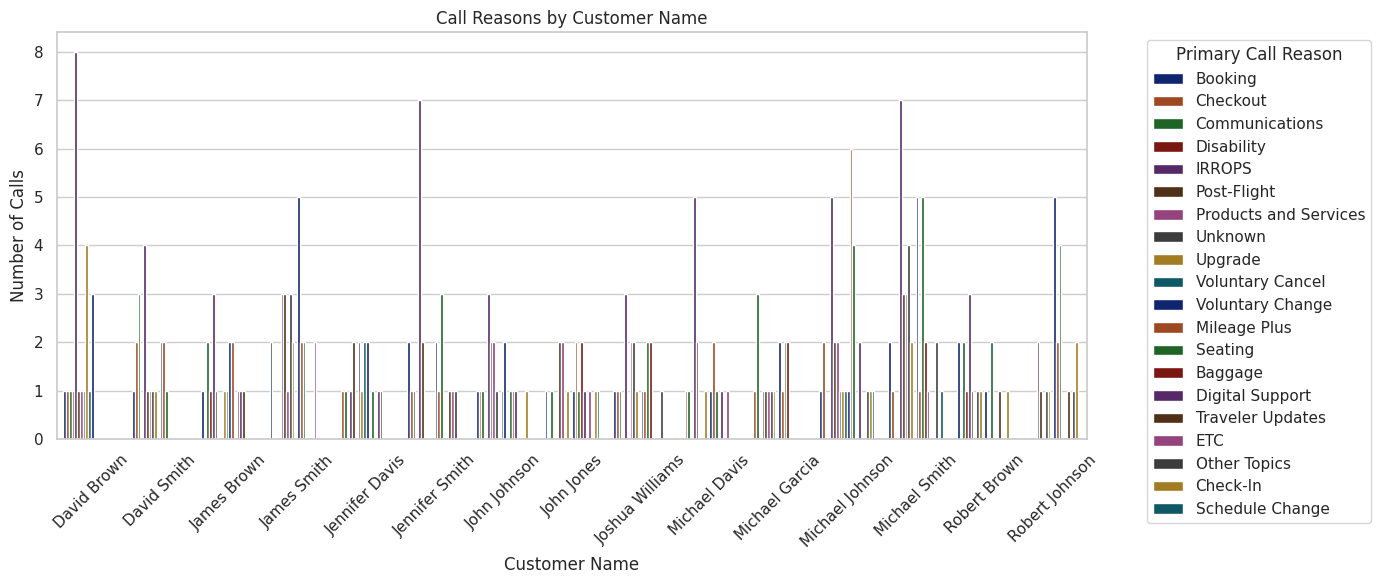

In [ ]:
customer_reason_counts = df.groupby(['customer_name', 'primary_call_reason']).size().reset_index(name='count')

# Limit to top N customers for better visualization
top_customers = customer_reason_counts['customer_name'].value_counts().head(15).index
filtered_data = customer_reason_counts[customer_reason_counts['customer_name'].isin(top_customers)]
print(filtered_data.sort_values(by='count', ascending=False).head(30))
# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(data=filtered_data, x='customer_name', y='count', hue='primary_call_reason' , palette= 'dark')
plt.title('Call Reasons by Customer Name')
plt.xlabel('Customer Name')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.legend(title='Primary Call Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


---


*   IRROPS , Voluntary change are the issues not resolved frequently.



---

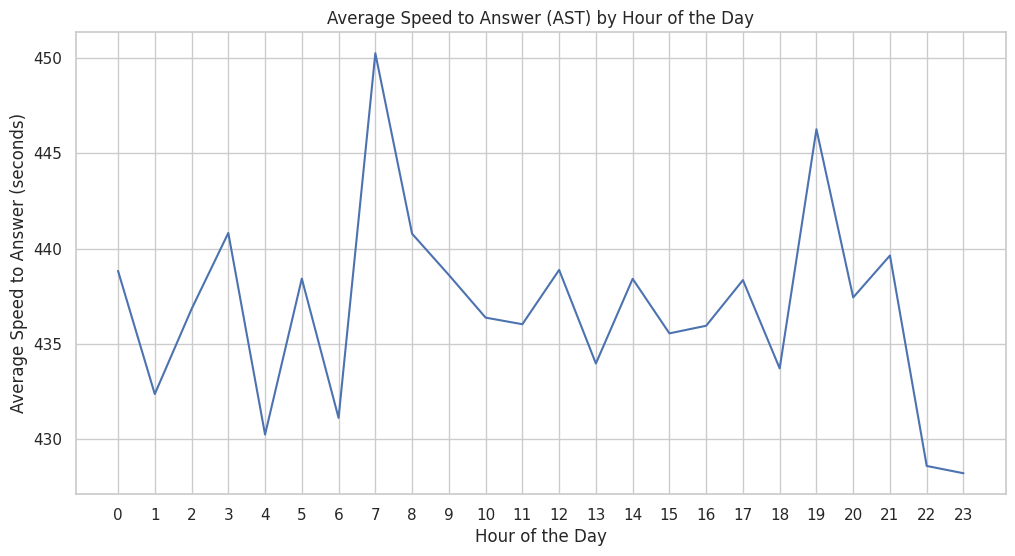

In [ ]:
# Convert call_start_datetime to datetime
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])

# Extract hour and day of the week
df['hour'] = df['call_start_datetime'].dt.hour
df['day_of_week'] = df['call_start_datetime'].dt.day_name()

# Calculate average AST by hour
ast_by_hour = df.groupby('hour')['waiting_time'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=ast_by_hour, x='hour', y='waiting_time')
plt.title('Average Speed to Answer (AST) by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Speed to Answer (seconds)')
plt.xticks(range(24))
plt.show()



---


**AST** is greater at 3A.M. , 7 A.M. , 7 P.M . and  average at 5 A.M. , 12 P.M. , 2 P.M. ,5 P.M. and 9 P.M.


---



In [ ]:
df.groupby('primary_call_reason')['average_sentiment'].mean()

,average_sentiment
primary_call_reason,
Baggage,-0.019725
Booking,-0.013445
Check-In,-0.042978
Checkout,-0.068992
Communications,-0.036392
Digital Support,-0.042096
Disability,0.035757
ETC,-0.049310
IRROPS,-0.074007


agent_id         383
call_duration    369
dtype: int64


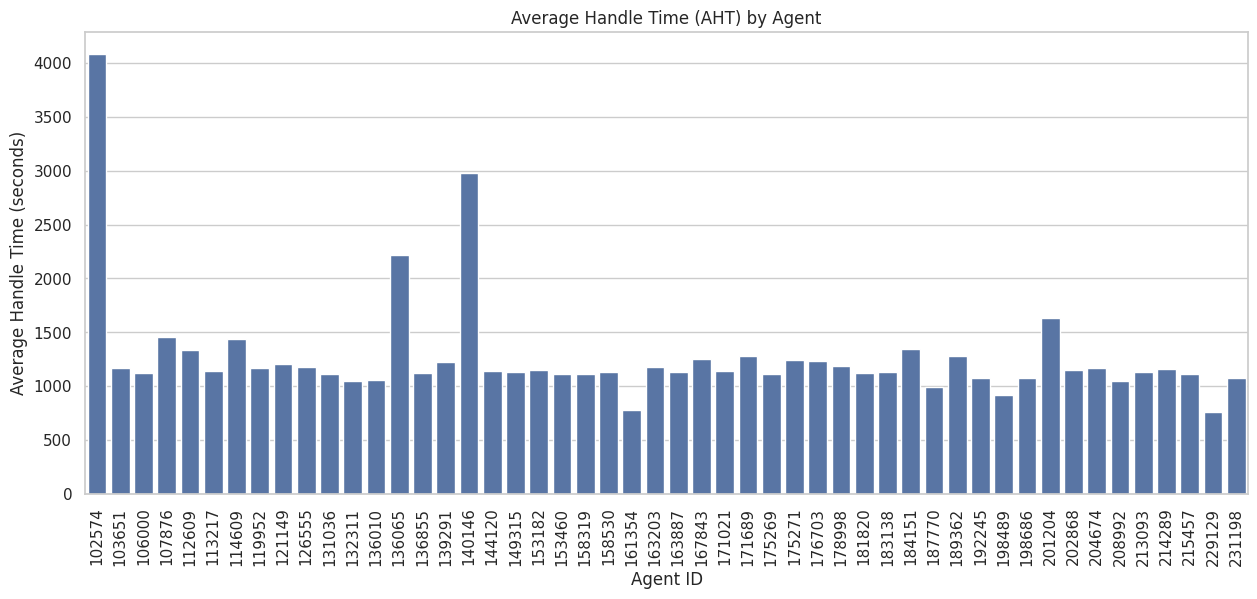

In [ ]:
agent_performance = df.groupby('agent_id')['call_duration'].mean().reset_index()
n_agent_performance = agent_performance.head(50)
plt.figure(figsize=(15, 6))
sns.barplot(data=n_agent_performance.sort_values('call_duration', ascending=False), x='agent_id', y='call_duration')
plt.title('Average Handle Time (AHT) by Agent')
plt.ylabel('Average Handle Time (seconds)')
plt.xlabel('Agent ID')
plt.xticks(rotation=90)
plt.show()

In [ ]:
high_aht_agents = agent_performance[agent_performance['call_duration'] > 1500]

# Print the agent IDs and corresponding AHT values
print(f"Total agents : {agent_performance['agent_id'].nunique()}")
print("Agents with AHT greater than 1500 seconds:")
print(high_aht_agents[['agent_id', 'call_duration']])
print(f"Total agents with AHT greater than 1500 seconds : {high_aht_agents['agent_id'].nunique()}")

Total agents : 383
Agents with AHT greater than 1500 seconds:
     agent_id  call_duration
0      102574    4080.000000
13     136065    2220.000000
16     140146    2980.000000
41     201204    1628.571429
60     255256    2900.000000
91     336455    2220.000000
115    384932    1950.000000
125    413148    1680.000000
160    506130    3300.000000
187    558705    2400.000000
212    618226    1530.000000
280    780490    2060.000000
286    788101    1720.000000
322    859203    1740.000000
339    901274    1565.454545
343    906082    1913.333333
Total agents with AHT greater than 1500 seconds : 16




---
**16 agents out of 383** are taking greater time to handle customers.


---




In [ ]:
elite_aht = df.groupby('elite_level_code')['call_duration'].mean().sort_values(ascending=False)
print(f"Customer loyality for AHT : {elite_aht}")
elite_ast = df.groupby('elite_level_code')['waiting_time'].mean().sort_values(ascending=False)
print(f"Customer loyality for AST : {elite_ast}")

Customer loyality for AHT : elite_level_code
 5.0    1308.360773
 4.0    1201.552941
 2.0    1159.222720
 3.0    1156.851464
 0.0    1134.578439
 1.0    1125.290188
-1.0    1110.888346
Name: call_duration, dtype: float64
Customer loyality for AST : elite_level_code
-1.0    442.715101
 0.0    438.579273
 1.0    436.918580
 2.0    432.772795
 3.0    429.341004
 4.0    413.308235
 5.0    411.410165
Name: waiting_time, dtype: float64




---


**Higher loyalty levels:** Elite customers are likely getting quicker access to agents (lower AST) but may have more complex queries or expectations, leading to longer AHT.

**Lower loyalty levels:** New or non-elite customers are seeing longer wait times but might be engaging in shorter, less complex interactions, which could explain the lower AHT.

**This shows that while elite customers enjoy faster service in terms of waiting times, their calls might require more time for resolution, possibly due to more personalized services or complex inquiries.**

---



Common Problems Faced by Customers:
primary_call_reason
IRROPS                   13311
Voluntary Change         10848
Seating                   6365
Mileage Plus              5851
Unknown                   5157
Post-Flight               4330
Communications            3840
Products and Services     3332
Baggage                   2832
Upgrade                   2738
Booking                   2637
Check-In                  1904
Checkout                  1888
Voluntary Cancel          1607
Digital Support           1225
ETC                        952
Traveler Updates           937
Other Topics               818
Schedule Change            731
Disability                 403
Unaccompanied Minor        104
Name: count, dtype: int64


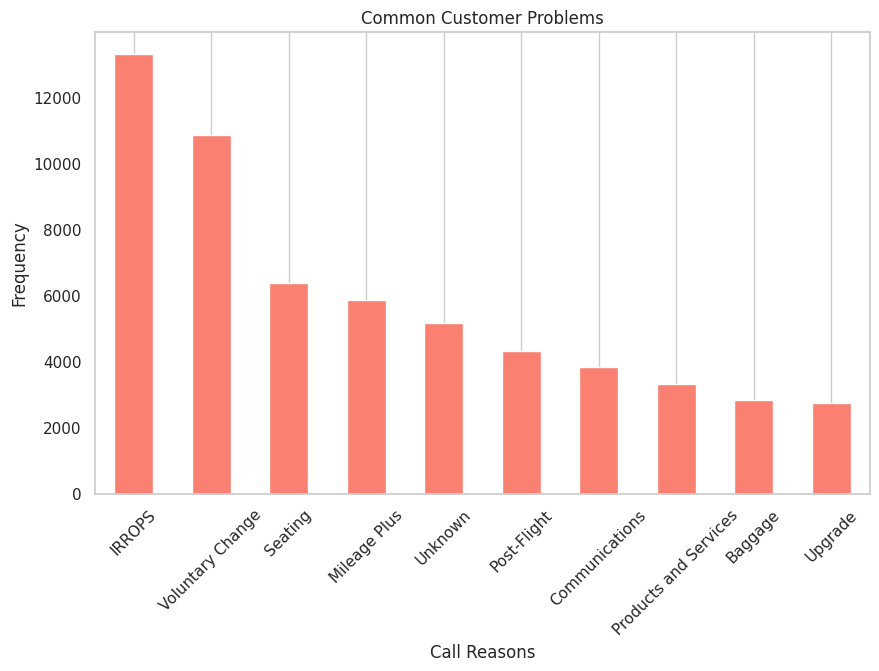

In [ ]:
# Identify high volume issues based on call reasons
common_problems = df['primary_call_reason'].value_counts()

# Display the most common problems faced by customers
print("Common Problems Faced by Customers:")
print(common_problems)

# Visualize the top 10 common problems
top_problems = common_problems.head(10)

plt.figure(figsize=(10, 6))
top_problems.plot(kind='bar', color='salmon')
plt.title('Common Customer Problems')
plt.xlabel('Call Reasons')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Common Problem Keywords in Transcripts:
problem: 52219
change: 50339
issue: 21503
delay: 18498
refund: 13324
complaint: 1313
error: 783
disappointed: 378
failed: 237
not working: 183


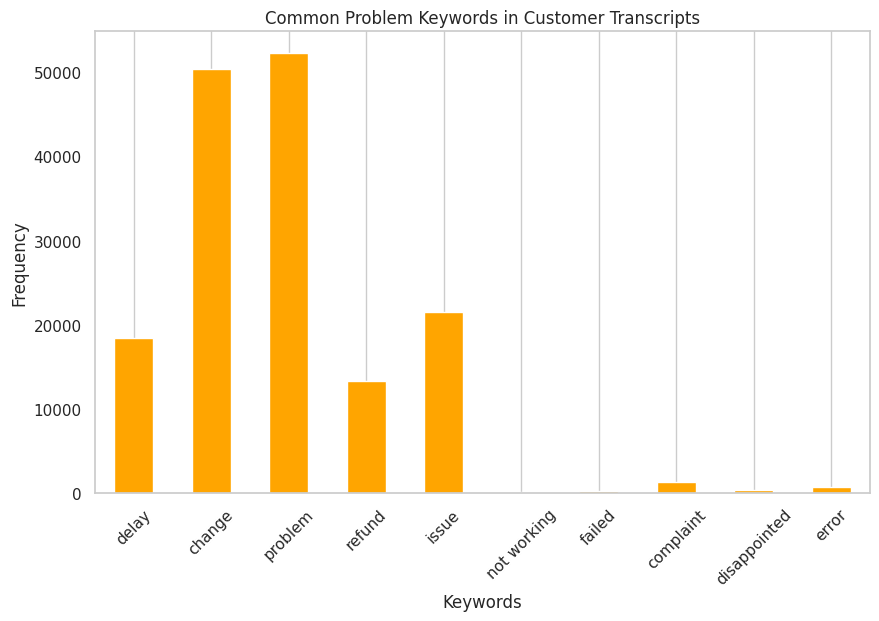

In [ ]:
import re
from collections import Counter

# Sample transcripts (replace with your actual transcripts)
# transcripts = df['transcript']  # Assuming you have a transcript column

# Define a list of common problem keywords
problem_keywords = ['issue', 'problem', 'complaint', 'not working', 'failed', 'disappointed', 'delay', 'refund', 'change', 'error']

# Create a list to hold all found keywords
all_keywords_found = []

# Loop through each transcript and find keywords
for transcript in df['call_transcript']:
    for keyword in problem_keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', transcript, re.IGNORECASE):
            all_keywords_found.append(keyword)

# Count occurrences of each keyword
keyword_counts = Counter(all_keywords_found)

# Display the most common problem keywords
print("Common Problem Keywords in Transcripts:")
for keyword, count in keyword_counts.most_common():
    print(f"{keyword}: {count}")

# Visualize the keyword frequencies
plt.figure(figsize=(10, 6))
pd.Series(keyword_counts).plot(kind='bar', color='orange')
plt.title('Common Problem Keywords in Customer Transcripts')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
